In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import shap
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.discrete.discrete_model import MNLogit
from numpy.linalg import LinAlgError
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error


In [54]:
import os

# Get absolute path of the current notebook directory
BASE_DIR = os.path.join(os.getcwd(), "data")

# Function to get the full path
def get_file_path(filename):
    return os.path.join(BASE_DIR, filename)

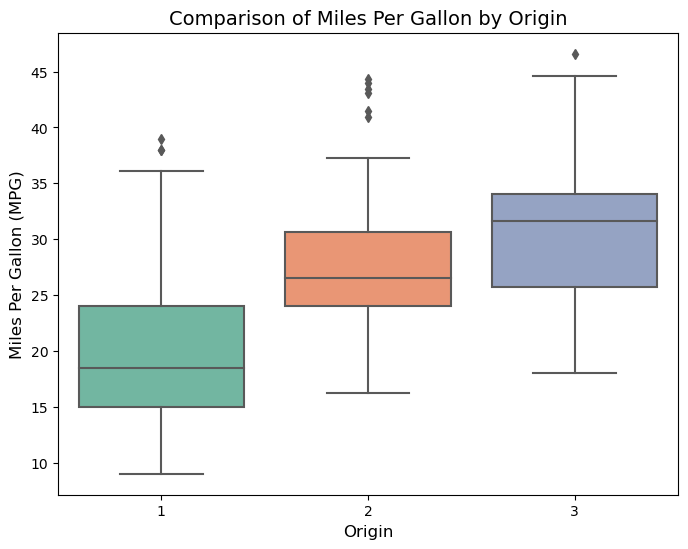

In [55]:
#load dataset
df= pd.read_csv(get_file_path("2025_Box-Plot_Dataset.csv"))

#creating a boxplot comparing Miles_Per_Gallon for different orign groups 
plt.figure(figsize=(8,6))
sns.boxplot(x='Origin', y="Miles_Per_Gallon", data=df, palette="Set2")

plt.title("Comparison of Miles Per Gallon by Origin", fontsize=14)
plt.xlabel("Origin", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)

plt.show()

# Q-Q Plot

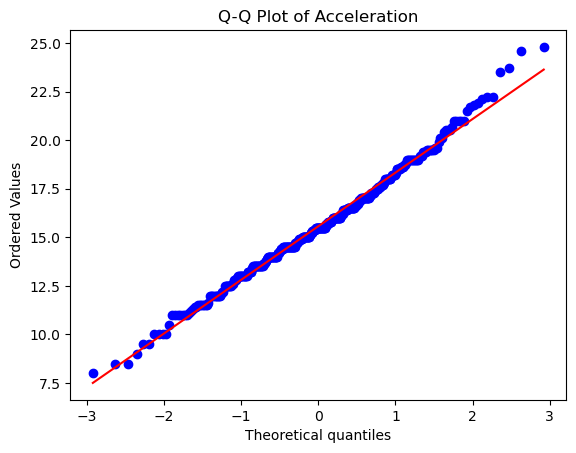

In [56]:
# Q-Q plot to check if 'Acceleration' follows the normal distribution

stats.probplot(df['Acceleration'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Acceleration")
plt.show()

## Kolmogorov-Smirnov (K-S) Test

In [57]:
ks_stat, ks_p_value = stats.kstest(df['Acceleration'], 'norm', args=(df['Acceleration'].mean(), df['Acceleration'].std()))

print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p_value:.4f}")

alpha = 0.05 #level of significance

if ks_p_value <= alpha:
    print("K-S Test: Reject H0 → 'Acceleration' is NOT normally distributed.")
else:
    print("K-S Test: Fail to reject H0 → 'Acceleration' follows a normal distribution.")

Kolmogorov-Smirnov Test: Statistic=0.0508, p-value=0.2466
K-S Test: Fail to reject H0 → 'Acceleration' follows a normal distribution.


## Shapiro-Wilk Test

In [58]:
shapiro_stat, shapiro_p_value = stats.shapiro(df['Acceleration'])

print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p_value:.4f}")

alpha = 0.05  # Significance level

if shapiro_p_value < alpha:
    print("S-W Test: Reject H0 → 'Acceleration' is NOT normally distributed.")
else:
    print("S-W Test: Fail to reject H0 → 'Acceleration' follows a normal distribution.")

Shapiro-Wilk Test: Statistic=0.9924, p-value=0.0399
S-W Test: Reject H0 → 'Acceleration' is NOT normally distributed.


## Linear Regression Model

In [59]:
df = pd.read_csv(get_file_path('2025_Regression_Dataset.csv'))

# Display first few rows
print(df.head())

   wtd_mean_atomic_radius  wtd_gmean_ThermalConductivity  \
0              105.514286                       0.621979   
1              106.342857                       0.624878   
2              104.371429                       0.629441   
3              104.542857                       0.633910   
4              104.885714                       0.642942   

   wtd_gmean_FusionHeat  wtd_gmean_fie  wtd_gmean_ElectronAffinity  \
0              1.040986     938.016780                   99.414682   
1              1.044545     937.025573                   97.774719   
2              1.039211     940.294344                   98.411962   
3              1.040986     940.391699                   96.998357   
4              1.044545     940.586438                   94.231770   

   wtd_entropy_ThermalConductivity  wtd_entropy_FusionHeat  \
0                         0.262848                0.994998   
1                         0.272820                1.044970   
2                         0.2834

In [60]:
print(df.isnull().sum())

print(df.info())

print(df.describe())

wtd_mean_atomic_radius             0
wtd_gmean_ThermalConductivity      0
wtd_gmean_FusionHeat               0
wtd_gmean_fie                      0
wtd_gmean_ElectronAffinity         0
wtd_entropy_ThermalConductivity    0
wtd_entropy_FusionHeat             0
wtd_entropy_ElectronAffinity       0
wtd_entropy_Density                0
std_FusionHeat                     0
std_fie                            0
std_atomic_radius                  0
std_atomic_mass                    0
range_Valence                      0
range_FusionHeat                   0
range_ElectronAffinity             0
range_Density                      0
mean_Valence                       0
mean_ThermalConductivity           0
mean_ElectronAffinity              0
mean_Density                       0
gmean_ThermalConductivity          0
gmean_FusionHeat                   0
gmean_fie                          0
gmean_atomic_mass                  0
entropy_ThermalConductivity        0
entropy_ElectronAffinity           0
c

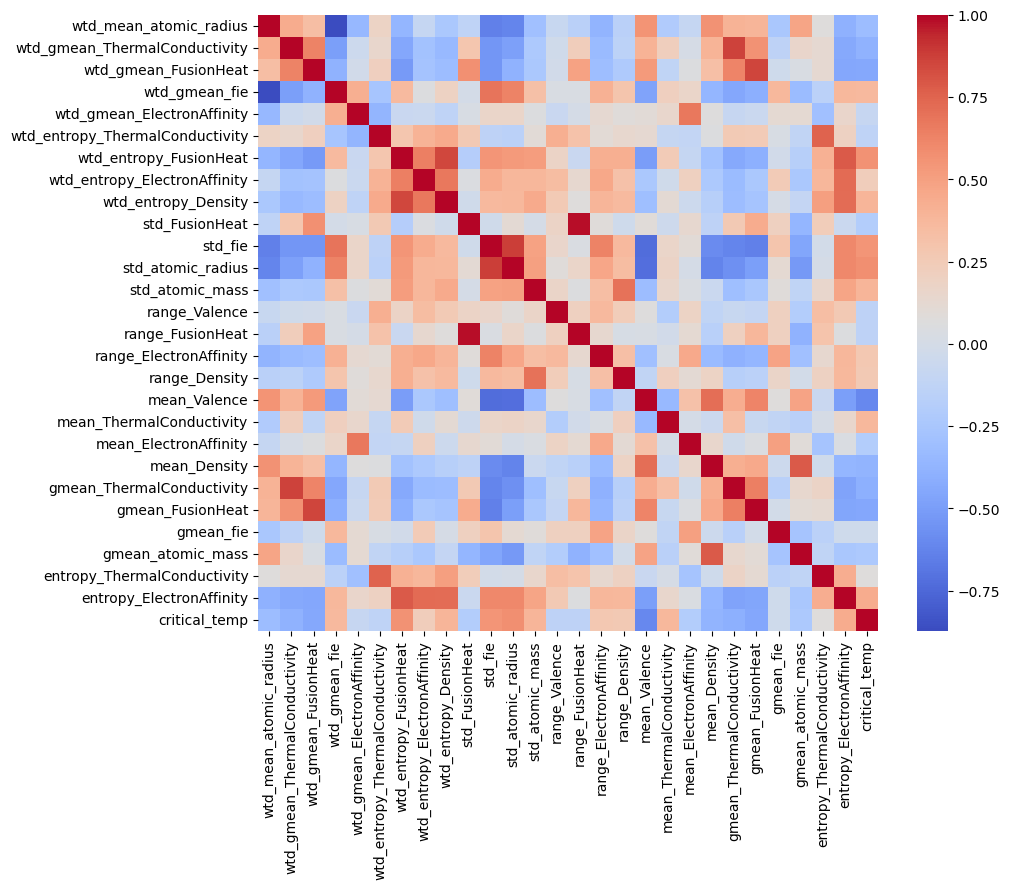

In [61]:
# Featuyre selection => Perfom correlation analysis to check:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [62]:
#Selected indepedet variables based on corrrelation
selected_features =["wtd_gmean_fie","wtd_entropy_FusionHeat","wtd_entropy_ElectronAffinity","wtd_entropy_Density", "std_fie","std_atomic_radius", "std_atomic_mass",
"range_ElectronAffinity","range_Density","mean_ThermalConductivity","entropy_ElectronAffinity"]


# Define independent (X) and dependent (y) variables
X = df[selected_features]
y = df["critical_temp"]

#split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
print(f"Intercept: {model.intercept_}")
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(coefficients)

Intercept: 9.858758417343662
                         Feature  Coefficient
0                  wtd_gmean_fie    -0.050728
1         wtd_entropy_FusionHeat    45.883388
2   wtd_entropy_ElectronAffinity   -29.566577
3            wtd_entropy_Density    -0.058841
4                        std_fie     0.091861
5              std_atomic_radius     0.413353
6                std_atomic_mass     0.126460
7         range_ElectronAffinity    -0.032388
8                  range_Density    -0.000680
9       mean_ThermalConductivity     0.179015
10      entropy_ElectronAffinity    -4.652724


In [64]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 569.6824682665567
R-squared Score: 0.5159699869885219


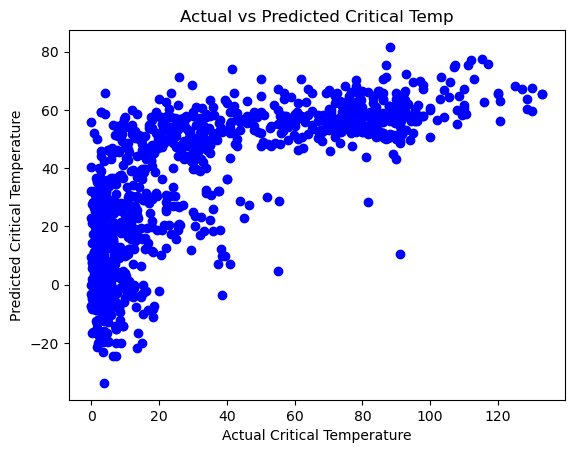

In [65]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Actual vs Predicted Critical Temp")
plt.show()


## Logistic Regression Backward

In [66]:
df = pd.read_csv(get_file_path("2025_Classification_Dataset.csv"))

# Data preprocessing
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle categorical variables using LabelEncoder on training data and transform test data
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Fit on training data and transform both train and test
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    # Handle unseen categories in test by assigning a default value (e.g., -1)
    # Note: This may require more sophisticated handling depending on the dataset
    X_test[col] = le.transform(X_test[col].astype(str))

# Remove constant features from training data
selector = VarianceThreshold(threshold=0)
X_train_processed = selector.fit_transform(X_train)
selected_columns = X_train.columns[selector.get_support()]
X_train = pd.DataFrame(X_train_processed, columns=selected_columns, index=X_train.index)
X_test = X_test[selected_columns]

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Backward Selection with intercept protection
def backward_elimination(X, y):
    X_opt = X.copy()
    while True:
        try:
            model = MNLogit(y, X_opt).fit(disp=0)
        except LinAlgError:
            # Handle singular matrix by removing the last added feature and break
            break
        p_values = model.pvalues
        # Exclude 'const' from consideration
        p_values_filtered = p_values.drop('const', errors='ignore')
        if p_values_filtered.empty:
            break
        max_p_value = p_values_filtered.max().max()
        if max_p_value > 0.05:
            # Find the feature with the highest p-value across any class
            max_feature = p_values_filtered.max(axis=1).idxmax()
            X_opt = X_opt.drop(columns=[max_feature])
        else:
            break
    return X_opt.columns

selected_features = backward_elimination(X_train_sm, y_train)
# Ensure 'const' is included if present
if 'const' in X_train_sm.columns:
    selected_features = list(selected_features) + ['const']
X_train_selected = X_train_sm[selected_features]
X_test_selected = sm.add_constant(X_test, has_constant='add')[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Model Fitting with increased max_iter and solver
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train_selected_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_selected_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/musiliandrew/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy: 0.9415584415584416
Confusion Matrix:
 [[724   3]
 [ 42   1]]
Classification Report:
               precision    recall  f1-score   support

          No       0.95      1.00      0.97       727
         Yes       0.25      0.02      0.04        43

    accuracy                           0.94       770
   macro avg       0.60      0.51      0.51       770
weighted avg       0.91      0.94      0.92       770



In [67]:
import numpy as np

# Get coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_[0]  # model.coef_ returns a 2D array, we take the first row

# Print results
print("Intercept:", intercept)
for feature, coef in zip(selected_features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}, Exp(Coeff): {np.exp(coef)}")


Intercept: [-1.62724828]
Feature: const, Coefficient: 0.0, Exp(Coeff): 1.0
Feature: shift, Coefficient: 0.24586199666849642, Exp(Coeff): 1.2787230933176406
Feature: gpuls, Coefficient: 0.167953831801793, Exp(Coeff): 1.182881997856601
Feature: nbumps2, Coefficient: 0.16101110715643788, Exp(Coeff): 1.1746980162960454
Feature: nbumps3, Coefficient: 0.17179863722619895, Exp(Coeff): 1.1874387031877787
Feature: const, Coefficient: 0.0, Exp(Coeff): 1.0


In [68]:
df = pd.read_csv(get_file_path('2025_Credit-card-clients.csv'))

# Encode categorical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split features and target
X = df.drop(columns=["Y"])  # Replace 'target' with actual target column name
y = df["Y"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model 1: Support Vector Machine (SVM) 

In [69]:
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 SVM Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))
print("=" * 50)

🔹 SVM Results 🔹
Accuracy: 0.8
Precision: 0.6777251184834123
Recall: 0.30105263157894735
F1 Score: 0.41690962099125367
Confusion Matrix:
 [[1457   68]
 [ 332  143]]
ROC-AUC Score: 0.7203009490940466


## Model 2: CHAID Decision Tree

In [70]:
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=10)  # CHAID Approximation
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)
y_prob_tree = decision_tree.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Decision Tree (CHAID) Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_tree))
print("=" * 50)

🔹 Decision Tree (CHAID) Results 🔹
Accuracy: 0.806
Precision: 0.6790123456790124
Recall: 0.3473684210526316
F1 Score: 0.4596100278551532
Confusion Matrix:
 [[1447   78]
 [ 310  165]]
ROC-AUC Score: 0.7404210526315789


In [71]:
## Model 3: K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 KNN Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))
print("=" * 50)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7feb88b96710>
Traceback (most recent call last):
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_

🔹 KNN Results 🔹
Accuracy: 0.769
Precision: 0.5239852398523985
Recall: 0.29894736842105263
F1 Score: 0.3806970509383378
Confusion Matrix:
 [[1396  129]
 [ 333  142]]
ROC-AUC Score: 0.6747113028472821


In [72]:
import shap
from sklearn.ensemble import RandomForestClassifier

# 1. Train a Random Forest CLASSIFIER (not Regressor)
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",  # Handle class imbalance
    random_state=42
)
rf_model.fit(X_train, y_train)

# 2. Use TreeExplainer (optimized for tree models)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# 3. Rank features by importance (using SHAP values for class 1)
shap_importance = pd.DataFrame({
    "Feature": X.columns,
    "SHAP Importance": np.abs(shap_values[1]).mean(axis=0)
}).sort_values("SHAP Importance", ascending=False)

print("Top Features by SHAP Importance:\n", shap_importance.head(10))

# 4. Plot SHAP summary (for class 1)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

ValueError: All arrays must be of the same length

/tmp/ipykernel_12841/500565962.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].fillna(method="ffill", inplace=True)
/tmp/ipykernel_12841/500565962.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Year"].fillna(method="ffill", inplace=True)


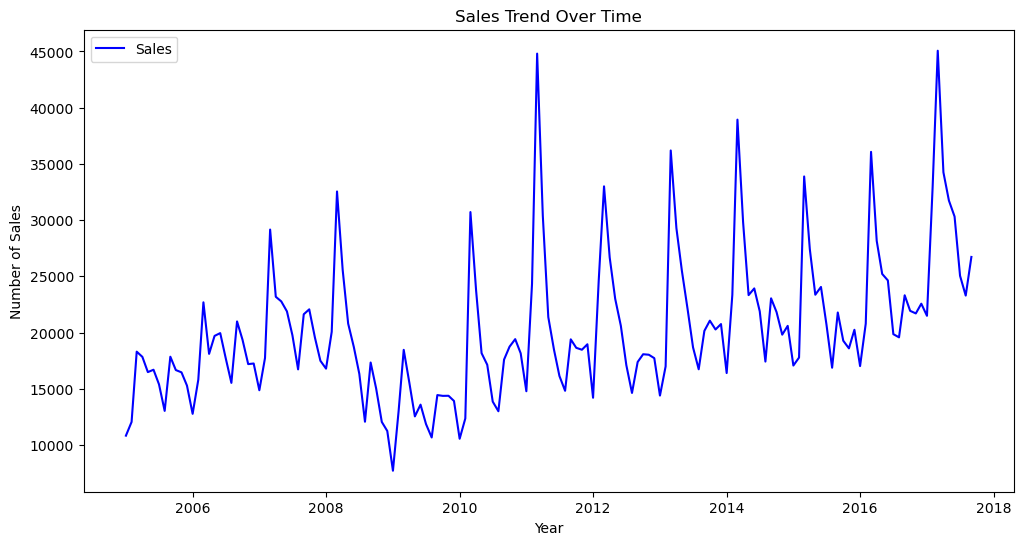

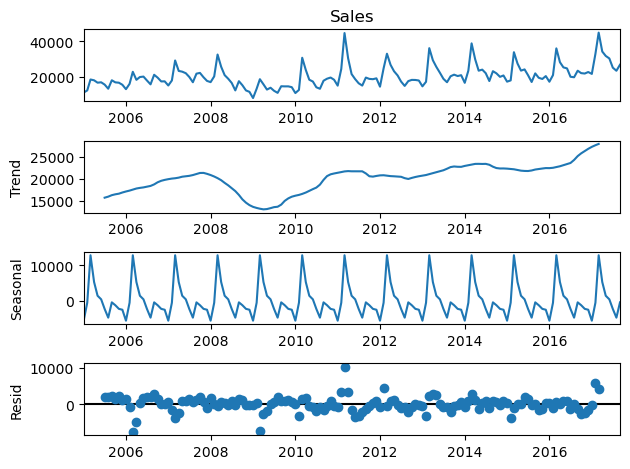

In [34]:
import pandas as pd

# Load dataset with correct delimiter and handle inconsistent formatting
df = pd.read_csv(get_file_path("TimeSeries_Dataset.csv"), 
                 header=None, 
                 names=["Year", "Month", "Sales"],
                 skipinitialspace=True)  # Removes extra spaces

# Forward fill missing years
df["Year"].fillna(method="ffill", inplace=True)

# Clean and convert 'Sales' column
df["Sales"] = df["Sales"].astype(str).str.replace(",", "").str.strip('" ').astype(int)

# Create a 'Date' column
df["Date"] = pd.to_datetime(df["Year"].astype(int).astype(str) + "-" + df["Month"].astype(int).astype(str), format="%Y-%m")

# Set 'Date' as index and drop unnecessary columns
df.set_index("Date", inplace=True)
df.drop(columns=["Year", "Month"], inplace=True)

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Sales"], label="Sales", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.legend()
plt.show()

# Decomposition to analyze trend and seasonality
decomposition = sm.tsa.seasonal_decompose(df["Sales"], model='additive', period=12)
decomposition.plot()
plt.show()


/home/musiliandrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/musiliandrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/musiliandrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/musiliandrew/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


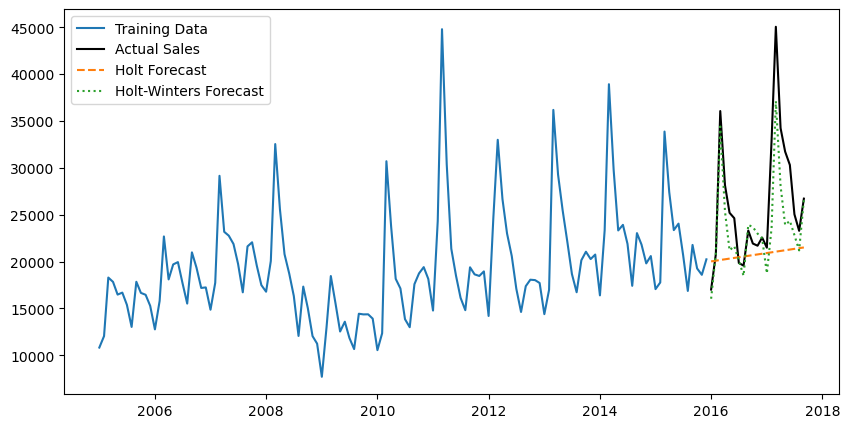

MSE - Holt's Model: 71802642.22
MSE - Holt-Winters Model: 16439804.83
Recommended Model: Holt-Winters


In [38]:
# Splitting data
train = df[:'2015-12-01']
test = df['2016-01-01':]

# Holt’s Linear Trend Model (HES)
holt_model = Holt(train['Sales']).fit()
holt_forecast = holt_model.forecast(len(test))
holt_mse = mean_squared_error(test['Sales'], holt_forecast)

# Holt-Winters Model (Multiplicative)
hw_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))
hw_mse = mean_squared_error(test['Sales'], hw_forecast)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales', color='black')
plt.plot(test.index, holt_forecast, label='Holt Forecast', linestyle='dashed')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', linestyle='dotted')
plt.legend()
plt.show()

# Selecting the best model
best_model = "Holt-Winters" if hw_mse < holt_mse else "Holt"
print(f"MSE - Holt's Model: {holt_mse:.2f}")
print(f"MSE - Holt-Winters Model: {hw_mse:.2f}")
print(f"Recommended Model: {best_model}")

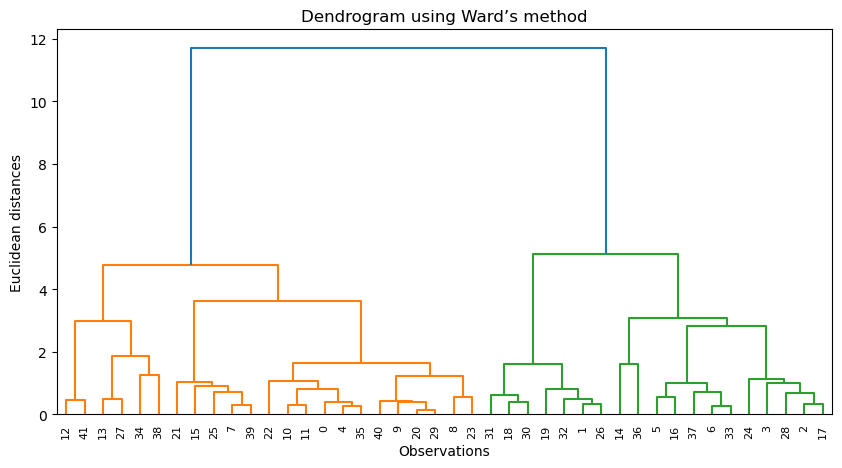

In [40]:
import scipy.cluster.hierarchy as sch
df = pd.read_csv(get_file_path("ClusterAnalysis_2025.csv"))

X = df.iloc[:, :].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(linked)
plt.title('Dendrogram using Ward’s method')
plt.xlabel('Observations')
plt.ylabel('Euclidean distances')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7feb7770cca0>
Traceback (most recent call last):
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/musiliandrew/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_

Cluster Centers:
 [[-0.51458263  0.68771988  0.78079648]
 [ 0.62291581 -0.83250301 -0.94517468]]


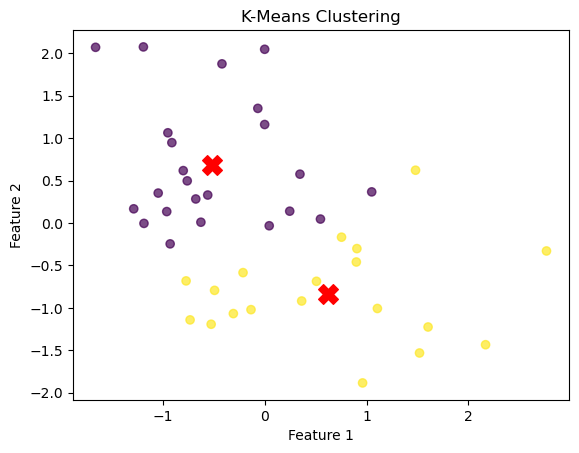

In [43]:
from sklearn.cluster import KMeans

k = 2  

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


print("Cluster Centers:\n", kmeans.cluster_centers_)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Cluster centers
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [44]:
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    # Compute intra-cluster distances (maximum distance within each cluster)
    for cluster in unique_clusters:
        points = X[labels == cluster]
        if len(points) > 1:
            intra_cluster_distances.append(np.max(pairwise_distances(points)))
    
    # Compute inter-cluster distances (minimum distance between clusters)
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            points_i = X[labels == unique_clusters[i]]
            points_j = X[labels == unique_clusters[j]]
            inter_cluster_distances.append(np.min(cdist(points_i, points_j)))
    
    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Compute Dunn Index
dunn_value = dunn_index(X_scaled, kmeans.labels_)
print("Dunn Index:", dunn_value)


Dunn Index: 0.2315306889122367


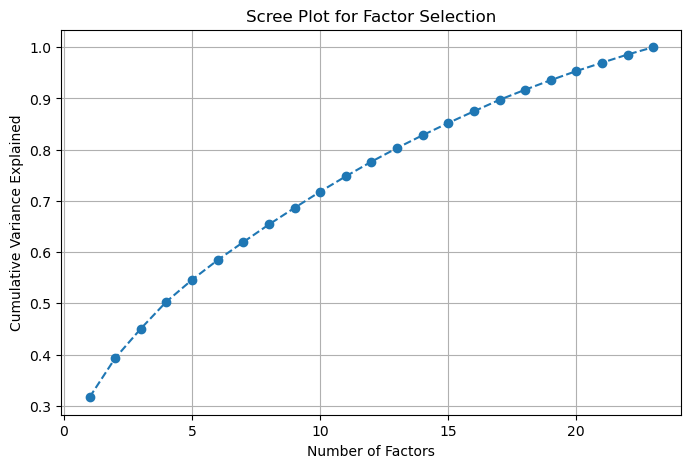

Selected Number of Factors: 10
Cumulative Variance Explained by Selected Factors: 71.81%

Factor Loadings after Varimax Rotation:
     Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7  \
q01  0.177639  0.581011  0.244872 -0.071363  0.096373  0.021116 -0.010911   
q02 -0.047620 -0.079967 -0.011805  0.459670 -0.149186 -0.050072  0.065653   
q03 -0.178200 -0.327755 -0.185804  0.494354 -0.213854 -0.066752 -0.010930   
q04  0.236886  0.557873  0.229563 -0.103305  0.138406  0.093506  0.009499   
q05  0.232120  0.521850  0.160935 -0.085474  0.121079  0.058713 -0.050905   
q06  0.754655  0.084064  0.129639 -0.057663  0.006659  0.099887 -0.054098   
q07  0.575663  0.266667  0.179769 -0.144333  0.163788  0.107179 -0.034660   
q08  0.126021  0.209417  0.764718  0.002217  0.080449  0.062487 -0.027782   
q09 -0.089330 -0.062031  0.051621  0.620680 -0.032541 -0.057504  0.040708   
q10  0.348726  0.208467  0.103830 -0.127250 -0.019253  0.129090 -0.033906   
q11  0.256313  0.186981

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

# Load dataset
df = pd.read_csv(get_file_path("2025_FactorAnalysis_Dataset.csv"))  # Replace with actual file

# Step 1: Check for missing values and handle them
df.dropna(inplace=True)  # Dropping missing values for simplicity

# Step 2: Standardize the data (PCA is affected by scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 3: Determine the number of factors using PCA
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel("Number of Factors")
plt.ylabel("Cumulative Variance Explained")
plt.title("Scree Plot for Factor Selection")
plt.grid()
plt.show()

# Select factors where cumulative variance reaches ~70% (common threshold)
n_factors = np.argmax(explained_variance.cumsum() >= 0.70) + 1
print(f"Selected Number of Factors: {n_factors}")

# Step 4: Compute the Cumulative Variance for Selected Factors
cumulative_variance = explained_variance[:n_factors].sum()
print(f"Cumulative Variance Explained by Selected Factors: {cumulative_variance:.2%}")

# Step 5: Perform PCA with Varimax Rotation
fa = FactorAnalyzer(n_factors, rotation="varimax")
fa.fit(df_scaled)
factor_loadings = fa.loadings_

# Step 6: Interpretation - Print Factor Loadings
factor_loadings_df = pd.DataFrame(factor_loadings, index=df.columns, columns=[f'Factor {i+1}' for i in range(n_factors)])
print("\nFactor Loadings after Varimax Rotation:")
print(factor_loadings_df)

# Identify variables highly associated with each factor
for i in range(n_factors):
    associated_vars = factor_loadings_df.iloc[:, i].abs().sort_values(ascending=False).index[:3]  # Top 3 variables per factor
    print(f"\nTop Variables Associated with Factor {i+1}: {list(associated_vars)}")
